# HW03

In [ ]:
history:https://chatgpt.com/share/66f46d5c-b4f8-8003-b18c-9fd6442c7c60
        https://chatgpt.com/share/66f46d86-0818-8003-b209-bba43d9f32b0
        https://chatgpt.com/share/66f46d96-3c9c-8003-ad23-56363fd6a6a3
        https://chatgpt.com/share/66f46da6-36e8-8003-aec6-5b3822a0a778
        https://chatgpt.com/share/66f46db4-5b1c-8003-a243-c14b6b9b4105

**1**

In [2]:
import pandas as pd
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
df = pd.read_csv(url)

# Drop rows with missing flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# Function to add location and scale annotations
def add_annotations(fig, species_data, species_name):
    # Calculate statistical values
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    std = species_data['flipper_length_mm'].std()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text=f'{species_name} Mean', annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='red', dash='dot'), annotation_text=f'{species_name} Median', annotation_position="top right")

    # Add vertical rectangles for the ranges
    # 1. Overall range
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor='green', opacity=0.1, line_width=0, 
                  annotation_text=f"{species_name} Range")
    # 2. Interquartile range (IQR)
    fig.add_vrect(x0=q1, x1=q3, fillcolor='purple', opacity=0.2, line_width=0, 
                  annotation_text=f"{species_name} IQR")
    # 3. Range within two standard deviations from the mean
    fig.add_vrect(x0=mean - 2*std, x1=mean + 2*std, fillcolor='orange', opacity=0.1, line_width=0, 
                  annotation_text=f"{species_name} ±2 SD")

# Create histograms for each species
fig = go.Figure()
species_list = df['species'].unique()

for species in species_list:
    species_data = df[df['species'] == species]
    fig.add_trace(go.Histogram(x=species_data['flipper_length_mm'], name=species, opacity=0.7))

    # Add annotations for location and scale
    add_annotations(fig, species_data, species)

# Update layout
fig.update_layout(
    title='Flipper Length Distribution for Each Penguin Species',
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Count',
    barmode='overlay'
)

# Show the plot
fig.show()


**2**

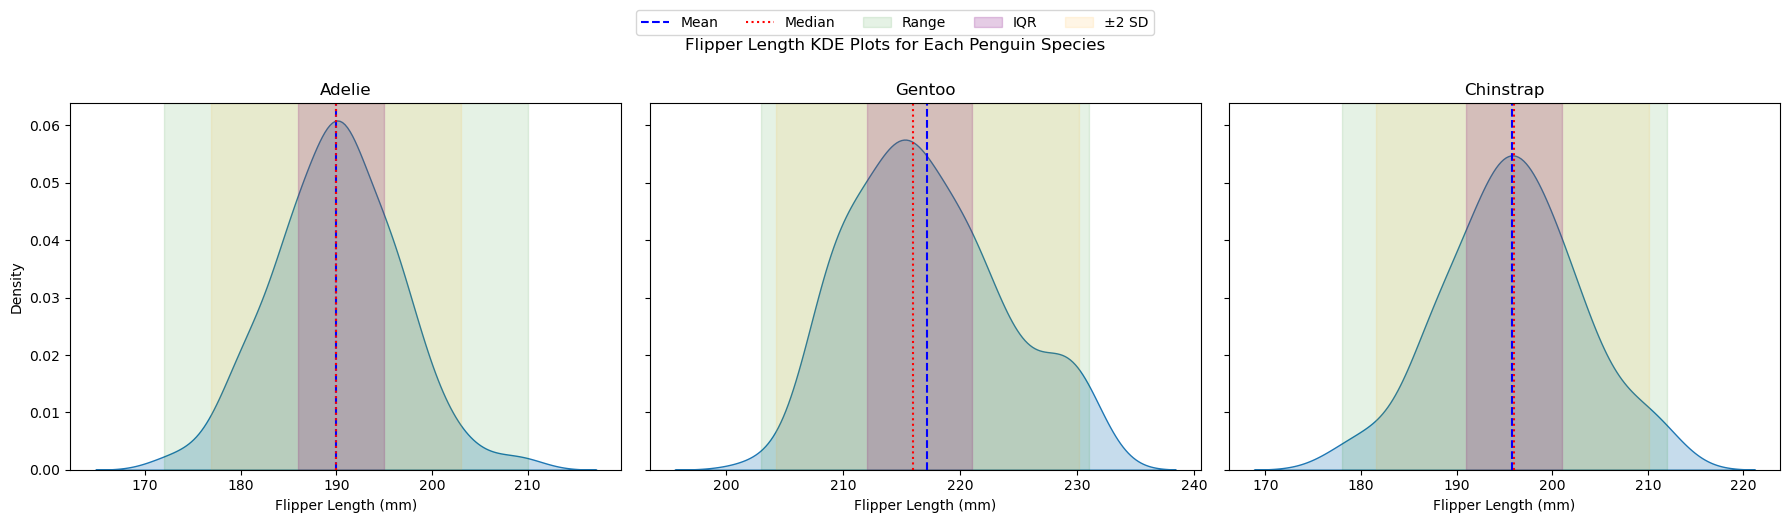

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
df = pd.read_csv(url)

# Drop rows with missing flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# List of unique species
species_list = df['species'].unique()

# Set up the figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Flipper Length KDE Plots for Each Penguin Species')

# Function to add location and scale annotations to each plot
def add_annotations(ax, species_data, species_name):
    # Calculate statistical values
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    std = species_data['flipper_length_mm'].std()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()

    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='red', linestyle=':', label='Median')

    # Add shaded areas for the ranges
    # 1. Overall range
    ax.axvspan(min_val, max_val, color='green', alpha=0.1, label='Range')
    # 2. Interquartile range (IQR)
    ax.axvspan(q1, q3, color='purple', alpha=0.2, label='IQR')
    # 3. Range within two standard deviations from the mean
    ax.axvspan(mean - 2*std, mean + 2*std, color='orange', alpha=0.1, label='±2 SD')

    # Set titles and labels
    ax.set_title(f'{species_name}')
    ax.set_xlabel('Flipper Length (mm)')

# Plot KDE for each species
for i, species in enumerate(species_list):
    species_data = df[df['species'] == species]
    sns.kdeplot(data=species_data, x='flipper_length_mm', ax=axes[i], fill=True)
    add_annotations(axes[i], species_data, species)

# Add a shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.05))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


**3**

In [5]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# 4
**1**
Datasets with Similar Means and Similar Variances:

A and C have similar means (around 5) and similar variances (8.45 and 9.17).


**2**
Datasets with Similar Means but Quite Different Variances:

A, B, and C have similar means (around 5) but different variances:
A: 8.45,
B: 2.19,
C: 9.17.
**3**
Datasets with Similar Variances but Quite Different Means:

No datasets fit this category closely since variances are not closely aligned with differing means.



**4**
Datasets with Quite Different Means and Quite Different Variances:

B and D:
B: Mean 5.03, Variance 2.19.
D: Mean 6.00, Variance 0.24.

**5**


In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

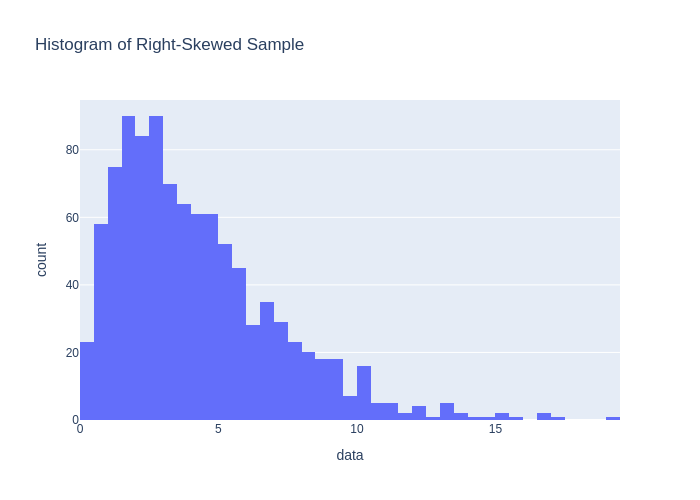

Sample 1 - Mean: 4.243584402625037, Median: [3.57293748]


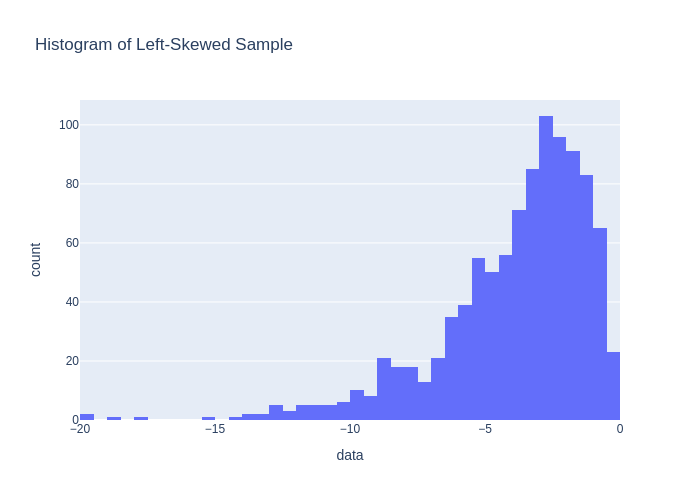

Sample 2 - Mean: -3.9337713856861303, Median: [-3.19728579]
Sample 1 is right-skewed (mean > median).
Sample 2 is left-skewed (mean < median).


In [7]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate a sample from a gamma distribution (right-skewed)
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for sample1
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Histogram of Right-Skewed Sample")
fig1.show(renderer="png")  # Use this for GitHub and MarkUs submissions

# Calculate the mean and median for sample1
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, [0.5])  # Calculate the median (50th percentile)

print(f"Sample 1 - Mean: {mean_sample1}, Median: {median_sample1}")

# Generate a sample from a gamma distribution and negate it (left-skewed)
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for sample2
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Histogram of Left-Skewed Sample")
fig2.show(renderer="png")  # Use this for GitHub and MarkUs submissions

# Calculate the mean and median for sample2
mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, [0.5])  # Calculate the median (50th percentile)

print(f"Sample 2 - Mean: {mean_sample2}, Median: {median_sample2}")

# Explore the relationship between mean, median, and skewness
if mean_sample1 > median_sample1:
    print("Sample 1 is right-skewed (mean > median).")
elif mean_sample1 < median_sample1:
    print("Sample 1 is left-skewed (mean < median).")
else:
    print("Sample 1 is symmetric (mean = median).")

if mean_sample2 > median_sample2:
    print("Sample 2 is right-skewed (mean > median).")
elif mean_sample2 < median_sample2:
    print("Sample 2 is left-skewed (mean < median).")
else:
    print("Sample 2 is symmetric (mean = median).")


The mean (average) is the sum of all values divided by the number of values.The median is the middle value of an ordered dataset. If the dataset has an even number of values, it is the average of the two middle numbers.
right-skewed distributions: Mean > Median  The presence of higher outliers pulls the mean up
left-skewed distributions: Mean < Median   The presence of lower outliers pulls the mean down.
symmetrical distributions: Mean = Median

**6**

In [8]:
# Maybe something like this? Feel free to use this one 
# if it strikes your fancy after look around a bit
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns
summary_stats = df.describe()
print(summary_stats)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Distribution of Calories in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Nutritional Values')
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Restaurant', y='Calories', data=df)
plt.title('Calories by Restaurant')
plt.xticks(rotation=45)
plt.show()


       restaurant id  category id    item id  serving size (oz)     calories  \
count     750.000000   750.000000  750.00000         395.000000   750.000000   
mean     2126.666667   113.685333  374.50000          10.612996   296.149333   
std       897.234043     9.956229  216.65064           7.286159   209.034366   
min      1000.000000   100.000000    0.00000           0.035274     0.000000   
25%      1000.000000   106.000000  187.25000           5.200000   150.000000   
50%      2000.000000   111.000000  374.50000          10.158912   260.000000   
75%      3000.000000   123.000000  561.75000          16.000000   410.000000   
max      3000.000000   130.000000  749.00000          32.000000  1880.000000   

       calories from fat  total fat (% daily value)  saturated fat (g)  \
count         260.000000                 260.000000         637.000000   
mean          127.096154                  21.815385           3.409105   
std           127.875914                  21.885199      

KeyError: 'Calories'

<Figure size 1000x600 with 0 Axes>

**7**

In [9]:
import plotly.express as px

df = px.data.gapminder()

fig = px.bar(df, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])
fig.show()

**8**

In [ ]:
import plotly.express as px

# Load the Gapminder dataset
df = px.data.gapminder()

# Calculate percent change and rank for the scatter plot
# You might need to adjust the DataFrame to include the 'percent change' and 'rank' columns.
# For this example, we will simulate these columns for demonstration.
# Assuming you have a DataFrame with 'percent_change', 'rank', and 'percent' columns already:

# Create the scatter plot
fig = px.scatter(
    df, 
    x="percent change",  # Replace with your actual column name for percent change
    y="rank",            # Replace with your actual column name for rank
    size="percent",      # Replace with your actual column name for percent
    color="sex", 
    animation_frame="year", 
    animation_group="name", 
    hover_name="name",
    size_max=50,
    range_x=[-0.005, 0.005]
)

# Show the figure
fig.show()


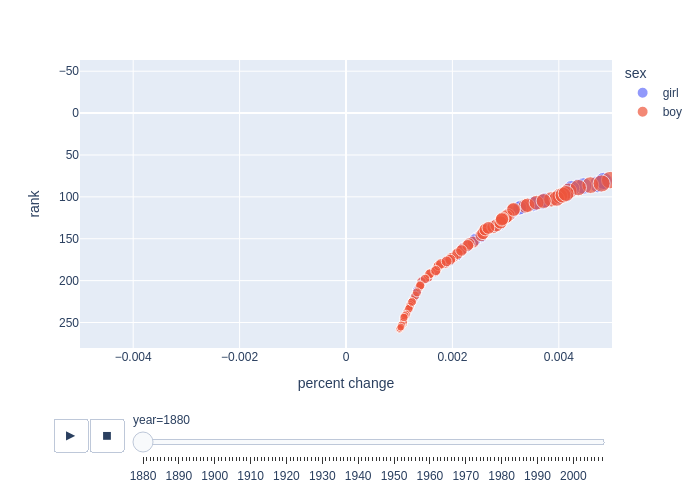

In [11]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Calculate rank and percent change
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])
bn['percent change'] = bn['percent'].diff()

# Identify new names
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort by year and filter for common names
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # restrict to "common" names

# Create the scatter plot
fig = px.scatter(
    bn, 
    x="percent change",       # X-axis as percent change
    y="rank",                 # Y-axis as rank
    animation_frame="year",   # Animation frame based on year
    animation_group="name",   # Grouping for animation
    size="percent",           # Size of markers based on percent
    color="sex",              # Color based on sex
    hover_name="name",        # Hover text shows name
    size_max=50,              # Max size of markers
    range_x=[-0.005, 0.005]   # Range for X-axis
)

# Update Y-axis to reverse the order (rank 1 on top)
fig.update_yaxes(autorange='reversed')

# Show the figure
fig.show(renderer="png")  # Use 'png' renderer for submissions


**9**
mostly